## Testing whether the bottleneck is from the data size
### spoiled results as the timesleep is not consistent

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    NODE_PROFILING_RESULTS_PATH
)
from experiments.utils.parser import Parser

In [2]:
series = 37
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_PATH,
    'series',
    str(series))
loader1 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node')
# loader2 = Loader(
#     series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node_with_log')
results_1 = loader1.result_processing()
# results_2 = loader2.result_processing()
key_config_df = loader1.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine
0,1,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,37,fastapi-big,1,False
1,2,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,37,fastapi-big,1,False
2,3,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,37,fastapi-small,1,False
3,4,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,37,fastapi-small,1,False
4,5,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,37,mlserver-small,1,False
5,6,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,37,mlserver-small,1,False
6,7,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,37,mlserver-big,1,False
7,8,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,37,mlserver-big,1,False
8,9,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,37,seldon-small,1,False
9,10,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,37,seldon-small,1,False


In [3]:
results_1.sort_values(['experiment_id'])

,experiment_id,client_to_model_latencies_avg,client_to_model_latencies_p99,client_to_model_latencies_p50,client_to_model_latencies_var,client_to_model_latencies_max,client_to_model_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
6,1,0.621333,1.266224,0.594677,0.087865,1.319601,0.027597,1.003172,1.038867,1.000713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,151.921275,296.825156,152.140309,7395.705052,299.960467,0.133336,1.003085,1.036113,1.000532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,0.376753,0.709643,0.375884,0.023245,0.751985,0.001600,1.002152,1.018857,1.000858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,151.127537,297.345831,151.317650,7471.633201,299.466553,0.142005,1.001586,1.015461,1.000527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,0.120213,1.123437,0.088226,0.022699,1.165963,0.004418,0.000867,0.001668,0.000613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,6,88.005218,174.968772,85.084386,2564.447301,176.391342,0.183590,0.001723,0.001699,0.000611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7,39.208960,77.775910,39.389696,548.478065,79.080797,0.287000,0.006832,0.010370,0.006652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,149.786372,295.570708,149.299910,7363.476420,298.688544,0.397450,0.006759,0.010031,0.006686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,10.546103,19.893156,10.607487,29.385959,20.364210,0.274203,0.294540,0.566670,0.299179,...,229658624.0,1.396028e+16,5.125038e+08,229302272.0,25.543703,49.528284,25.516959,204.440533,49.841106,0.928667
3,10,151.480085,297.507880,152.273336,7458.992938,300.732788,0.789407,0.249729,0.555127,0.234276,...,454537216.0,1.540952e+16,8.109957e+08,228831232.0,60.892762,74.548655,73.000000,427.018761,74.739496,1.283150


In [4]:
configs = loader1.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0'],
    'no_engine': False,
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 37,
    'series_meta': 'fastapi-big',
    'timeout': 5,
    'workload_config': {'load_duration': 60, 'loads_to_test': [100, 1000]},
    'workload_type': 'static'}
File name: 1.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0'],
    'no_engine': False,
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 37,
    'series_meta': 'fastapi-small',
    'timeout': 5,
    'workload_config': {'load_duration': 60, 'loads_to_test': [100, 1000]},
    'workload_type': 'static'

In [7]:
model_variant = 1
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 0]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load', 'series_meta']
results_columns = ['timeout_count', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
# ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
# ax.set_xlabel("Load")
# ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,load,series_meta,timeout_count,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,100,fastapi-big,0,0.621333,1.003172,0.002935
1,0,1,4,1000,fastapi-big,27409,151.921275,1.003085,0.009609
2,0,1,4,100,fastapi-small,0,0.376753,1.002152,0.003129
3,0,1,4,1000,fastapi-small,27063,151.127537,1.001586,0.007492
4,0,1,4,100,mlserver-small,0,0.120213,0.000867,0.021357
5,0,1,4,1000,mlserver-small,0,88.005218,0.001723,0.040228
6,0,1,4,100,mlserver-big,0,39.208960,0.006832,2.161943
7,0,1,4,1000,mlserver-big,46534,149.786372,0.006759,2.060637
8,0,1,4,100,seldon-small,1,10.546103,0.294540,0.087487
9,0,1,4,1000,seldon-small,36190,151.480085,0.249729,0.135373


,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,100,0.621333,1.003172,0.002935
1,0,1,4,1000,151.921275,1.003085,0.009609
2,0,1,4,100,0.376753,1.002152,0.003129
3,0,1,4,1000,151.127537,1.001586,0.007492
4,0,1,4,100,0.120213,0.000867,0.021357
5,0,1,4,1000,88.005218,0.001723,0.040228
6,0,1,4,100,39.208960,0.006832,2.161943
7,0,1,4,1000,149.786372,0.006759,2.060637
8,0,1,4,100,10.546103,0.294540,0.087487
9,0,1,4,1000,151.480085,0.249729,0.135373


Text(0, 0.5, 'Latency (seconds)')

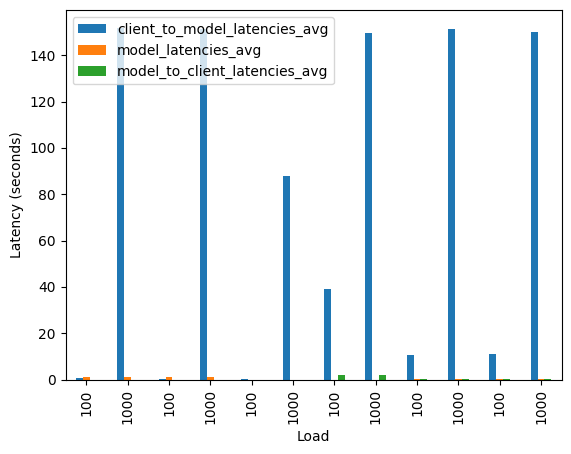

In [7]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_max,model_latencies_max,model_to_client_latencies_max
0,0,1,4,100,1.319601,1.069726,0.086862
1,0,1,4,1000,299.960467,1.085839,0.838348
2,0,1,4,100,0.751985,1.028600,0.030750
3,0,1,4,1000,299.466553,1.030543,0.976273
4,0,1,4,100,1.165963,0.530745,1.095512
5,0,1,4,1000,176.391342,2.444739,1.820172
6,0,1,4,100,79.080797,0.018909,2.692583
7,0,1,4,1000,298.688544,0.019275,3.342207
8,0,1,4,100,20.364210,0.674344,0.668720
9,0,1,4,1000,300.732788,0.712115,1.764605


Text(0, 0.5, 'Latency (seconds)')

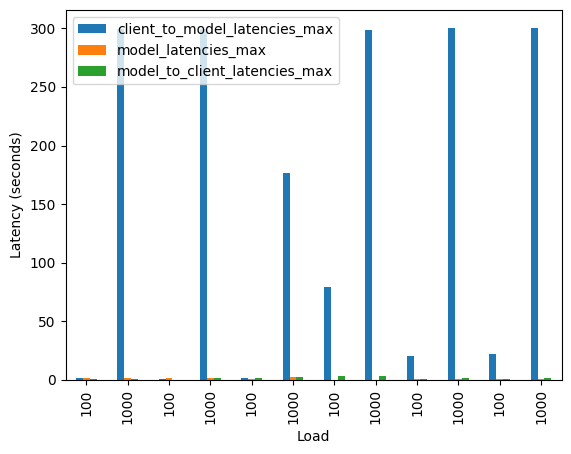

In [8]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_max', 'model_latencies_max', 'model_to_client_latencies_max']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_max', 'model_latencies_max', 'model_to_client_latencies_max'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

In [9]:
import time
results = loader1.read_results()
experiment_id = 4
responses = loader1.flatten_results(results[str(experiment_id)]['responses'])
sending_times = []
for response in responses:
    try:
        sending_time = time.ctime(response['timing']['sending_time'])
        model_arrival_time = time.ctime(
        json.loads(
            response['outputs'][0][
                'data'][0])['time']['arrival_mock_one'])
        arrival_time = time.ctime(response['timing']['arrival_time'])
    except KeyError:
        # print('timed out!')
        pass
    print(f"sending time: {sending_time}, model_arrival_time: {model_arrival_time}, arrival time: {arrival_time}")

NameError: name 'model_arrival_time' is not defined